# Insurance Data

In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import datetime as dt  
import streamlit as st
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random
from apyori import apriori

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11,6)})

from scipy.stats import spearmanr #spearmanr is used to find correlation

import missingno as msno

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("insurance.csv")
df

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,Telco,HomeAddress,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,single,NaN,home,english,Bachelor,malay,NaN,yes,yes,employer,maxis,north_mal,terrace,2.0,10242.0,NaN,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no
1,25.0,male,NaN,NaN,outdoor,malay,Diploma,chinese,Malaysian,no,yes,selfEmployed,umobile,east_mal,terrace,2.0,NaN,73926.0,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes
2,27.0,male,NaN,frequent,pub_goer,english,Bachelor,others,NaN,no,no,privateEemployee,celcom,central_mal,condominium,2.0,4316.0,140734.0,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes
3,33.0,female,NaN,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,no,privateEemployee,maxis,south_mal,terrace,NaN,4845.0,NaN,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no
4,28.0,female,NaN,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,umobile,east_mal,condominium,2.0,9883.0,98833.0,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,NaN,female,married,frequent,outdoor,english,Diploma,NaN,NaN,yes,yes,NaN,digi,north_mal,terrace,2.0,4831.0,NaN,PersonalRetirement,KidMedical,HomeSafe,driving,KidsFlyUp,yes
496,26.0,male,married,frequent,home,english,Bachelor,others,NaN,no,no,selfEmployed,maxis,east_mal,condominium,NaN,7455.0,65384.0,PersonalMedical,KidEducation,SchoolAgain,driving,KidsFlyUp,no
497,19.0,female,NaN,frequent,home,malay,Diploma,others,NaN,yes,no,NaN,maxis,central_mal,condominium,2.0,3329.0,51962.0,PersonalSaving,KidEducation,COVIDFree,driving,KidsFlyUp,no
498,41.0,male,NaN,once_in_a_while,pub_goer,malay,Bachelor,indian,Malaysian,yes,yes,privateEemployee,umobile,NaN,terrace,3.0,9300.0,NaN,PersonalRetirement,KidSaving,COVIDFree,driving,KidsFlyUp,no


In [3]:
nulls= df.isnull().sum()
nulls[nulls > 0]

Age                       92
MaritalStatus            142
SmokerStatus              66
Race                     115
Nationality              145
Occupation               145
HomeAddress               79
NoOfDependent             94
FamilyExpenses(month)    121
AnnualSalary             156
dtype: int64

In [4]:
df['FamilyExpenses(month)']=df['FamilyExpenses(month)'].fillna(df['FamilyExpenses(month)'].mean())
df['AnnualSalary']=df['AnnualSalary'].fillna(df['AnnualSalary'].mean())
df['Age']=df['Age'].fillna(df['Age'].median())

In [5]:
nulls= df.isnull().sum()
nulls[nulls > 0]

MaritalStatus    142
SmokerStatus      66
Race             115
Nationality      145
Occupation       145
HomeAddress       79
NoOfDependent     94
dtype: int64

In [6]:
df.Age.describe()

count    500.00000
mean      30.81800
std        7.03533
min       18.00000
25%       25.00000
50%       31.00000
75%       36.00000
max       44.00000
Name: Age, dtype: float64

In [7]:
df['MaritalStatus'] =df['MaritalStatus'].fillna("Unknown")
df['SmokerStatus'] =df['SmokerStatus'].fillna("Non_Smoker")
df['Race'] =df['Race'].fillna("Unknown")
df['Occupation'] =df['Occupation'].fillna("Unemployed")
df['Nationality'] =df['Nationality'].fillna("Unknown")
df['HomeAddress'] =df['HomeAddress'].fillna("central_mal")
df['NoOfDependent'] =df['NoOfDependent'].fillna(0)

# ARM

In [8]:
df1= df.copy()

In [9]:
arm = df1[['SmokerStatus','LifeStyle', 'Occupation', 'MedicalComplication', 'Customer_Needs_1']]
arm

,SmokerStatus,LifeStyle,Occupation,MedicalComplication,Customer_Needs_1
0,Non_Smoker,home,employer,no,PersonalSaving
1,Non_Smoker,outdoor,selfEmployed,yes,PersonalRetirement
2,frequent,pub_goer,privateEemployee,yes,PersonalMedical
3,once_in_a_while,pub_goer,privateEemployee,no,PersonalSaving
4,once_in_a_while,home,privateEemployee,yes,PersonalRetirement
...,...,...,...,...,...
495,frequent,outdoor,Unemployed,yes,PersonalRetirement
496,frequent,home,selfEmployed,no,PersonalMedical
497,frequent,home,Unemployed,no,PersonalSaving
498,once_in_a_while,pub_goer,privateEemployee,no,PersonalRetirement


In [10]:
records = []
for i in range(0, 500):
    records.append([str(arm.values[i,j]) for j in range(0, 5)])

In [11]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=5, random_state=0)
association_results = list(association_rules)

In [12]:
cnt =0

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(round(item[1],3)))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")

(Rule 1) employer -> yes
Support: 0.008
Confidence: 0.3333
Lift: 4.065
(Rule 2) selfEmployed -> Non_Smoker
Support: 0.006
Confidence: 0.5
Lift: 3.9683
(Rule 3) outdoor -> selfEmployed
Support: 0.006
Confidence: 0.3
Lift: 4.0541
(Rule 4) outdoor -> Non_Smoker
Support: 0.008
Confidence: 0.2667
Lift: 4.4444
(Rule 5) outdoor -> employer
Support: 0.006
Confidence: 0.375
Lift: 4.5732
(Rule 6) employer -> pub_goer
Support: 0.008
Confidence: 0.2
Lift: 4.5455
(Rule 7) selfEmployed -> PersonalSaving
Support: 0.008
Confidence: 0.4
Lift: 3.1746
(Rule 8) PersonalMedical -> Unemployed
Support: 0.008
Confidence: 0.2857
Lift: 5.7143
(Rule 9) PersonalMedical -> frequent
Support: 0.006
Confidence: 0.75
Lift: 3.3784
(Rule 10) PersonalMedical -> frequent
Support: 0.006
Confidence: 0.4286
Lift: 3.1983
(Rule 11) Unemployed -> once_in_a_while
Support: 0.016
Confidence: 0.2222
Lift: 5.0505
(Rule 12) govServant -> no
Support: 0.006
Confidence: 0.6
Lift: 4.1667
(Rule 13) privateEemployee -> outdoor
Support: 0.0

# Label Encoding

In [13]:
dle=df.copy()
le = preprocessing.LabelEncoder()
df["Gender"] = le.fit_transform(dle["Gender"].astype(str))
#df["SmokerStatus"] = le.fit_transform(dle["SmokerStatus"].astype(str))
dle["LifeStyle"] = le.fit_transform(dle["LifeStyle"].astype(str))
dle["MaritalStatus"] = le.fit_transform(dle["MaritalStatus"].astype(str))
dle["LanguageSpoken"] = le.fit_transform(dle["LanguageSpoken"].astype(str))
dle["HighestEducation"] = le.fit_transform(dle["HighestEducation"].astype(str))
dle["Race"] = le.fit_transform(dle["Race"].astype(str))
dle["Nationality"] = le.fit_transform(dle["Nationality"].astype(str))
dle["MalaysiaPR"] = le.fit_transform(dle["MalaysiaPR"].astype(str))
dle["MovingToNewCompany"] = le.fit_transform(dle["MovingToNewCompany"].astype(str))
#dle["Occupation"] = le.fit_transform(dle["Occupation"].astype(str))
dle["Telco"] = le.fit_transform(dle["Telco"].astype(str))
dle["HomeAddress"] = le.fit_transform(dle["HomeAddress"].astype(str))
#dle["ResidentialType"] = le.fit_transform(dle["ResidentialType"].astype(str))
#dle["Customer_Needs_1"] = le.fit_transform(dle["Customer_Needs_1"].astype(str))
#dle["Customer_Needs_2"] = le.fit_transform(dle["Customer_Needs_2"].astype(str))
#dle["PurchasedPlan1"] = le.fit_transform(dle["PurchasedPlan1"].astype(str))
dle["Transport"] = le.fit_transform(dle["Transport"].astype(str))
#dle["PurchasedPlan2"] = le.fit_transform(dle["PurchasedPlan2"].astype(str))
#dle["MedicalComplication"] = le.fit_transform(dle["MedicalComplication"].astype(str))

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

insure_sex =  dle["Gender"]
#insure_smoker =  dle["SmokerStatus"]
insure_lifestyle =  dle["LifeStyle"]
insure_marital =  dle["MaritalStatus"]
insure_language =  dle["LanguageSpoken"]
insure_highedu =  dle["HighestEducation"]
insure_race =  dle["Race"]
insure_nationality =  dle["Nationality"]
insure_masPR = dle["MalaysiaPR"]
insure_movingnewcompany = dle["MovingToNewCompany"]
#insure_occupation = dle["Occupation"]
insure_telco = dle["Telco"]
insure_address = dle["HomeAddress"]
#insure_ResType = dle["ResidentialType"]
#insure_cus1 = dle["Customer_Needs_1"]
#insure_cus2 = dle["Customer_Needs_2"]
#insure_purplan1 = dle["PurchasedPlan1"]
insure_transport = dle["Transport"]
#insure_purplan2 = dle["PurchasedPlan2"]
#insure_medical = dle["MedicalComplication"]

insure_sex_encoded = encoder.fit_transform(insure_sex)
#insure_smoker_encoded = encoder.fit_transform(insure_smoker)
insure_region_encoded = encoder.fit_transform(insure_lifestyle)
insure_marital_encoded = encoder.fit_transform(insure_marital)
insure_language_encoded = encoder.fit_transform(insure_language)
insure_highedu_encoded = encoder.fit_transform(insure_highedu)
insure_race_encoded = encoder.fit_transform(insure_race)
insure_nationality_encoded = encoder.fit_transform(insure_nationality)
insure_masPR_encoded = encoder.fit_transform(insure_masPR)
insure_movingnewcompany_encoded = encoder.fit_transform(insure_movingnewcompany)
#insure_occupation_encoded = encoder.fit_transform(insure_occupation)
insure_telco_encoded = encoder.fit_transform(insure_telco)
insure_address_encoded = encoder.fit_transform(insure_address)
#insure_ResType_encoded = encoder.fit_transform(insure_ResType)
#insure_cus1_encoded = encoder.fit_transform(insure_cus1)
#insure_cus2_encoded = encoder.fit_transform(insure_cus2)
#insure_purplan1_encoded = encoder.fit_transform(insure_purplan1)
insure_transport_encoded = encoder.fit_transform(insure_transport)
#insure_purplan2_encoded = encoder.fit_transform(insure_purplan2)
#insure_medical_encoded = encoder.fit_transform(insure_medical)


In [15]:
dfa = df.copy()

# df2['age_bins'] = pd.cut(x=df2['Age_Range'], bins=[28,35,36,43,44,51,52,59], labels=['Young_Adult','Mid_Aged_Adult','Older_Adult','Senior_Citizen'])
dfa['age_bins'] = pd.cut(x=dfa['Age'], bins=[17,25,33,41, 48], labels=['Teenager','Young_Adult','Mid_Aged_Adult','Older_Adult'])


In [16]:
dfa.to_csv("dfa.csv")

In [17]:
dfa

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,Telco,HomeAddress,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication,age_bins
0,35.0,0,single,Non_Smoker,home,english,Bachelor,malay,Unknown,yes,yes,employer,maxis,north_mal,terrace,2.0,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,driving,NoMoneyDown,no,Mid_Aged_Adult
1,25.0,1,Unknown,Non_Smoker,outdoor,malay,Diploma,chinese,Malaysian,no,yes,selfEmployed,umobile,east_mal,terrace,2.0,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,driving,XEdu,yes,Teenager
2,27.0,1,Unknown,frequent,pub_goer,english,Bachelor,others,Unknown,no,no,privateEemployee,celcom,central_mal,condominium,2.0,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,driving,KidsFlyUp,yes,Young_Adult
3,33.0,0,Unknown,once_in_a_while,pub_goer,english,Bachelor,malay,Malaysian,yes,no,privateEemployee,maxis,south_mal,terrace,0.0,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,driving,NoMoneyDown,no,Young_Adult
4,28.0,0,Unknown,once_in_a_while,home,english,Bachelor,chinese,Malaysian,yes,yes,privateEemployee,umobile,east_mal,condominium,2.0,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,driving,KidsFlyUp,yes,Young_Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31.0,0,married,frequent,outdoor,english,Diploma,Unknown,Unknown,yes,yes,Unemployed,digi,north_mal,terrace,2.0,4831.000000,118087.540698,PersonalRetirement,KidMedical,HomeSafe,driving,KidsFlyUp,yes,Young_Adult
496,26.0,1,married,frequent,home,english,Bachelor,others,Unknown,no,no,selfEmployed,maxis,east_mal,condominium,0.0,7455.000000,65384.000000,PersonalMedical,KidEducation,SchoolAgain,driving,KidsFlyUp,no,Young_Adult
497,19.0,0,Unknown,frequent,home,malay,Diploma,others,Unknown,yes,no,Unemployed,maxis,central_mal,condominium,2.0,3329.000000,51962.000000,PersonalSaving,KidEducation,COVIDFree,driving,KidsFlyUp,no,Teenager
498,41.0,1,Unknown,once_in_a_while,pub_goer,malay,Bachelor,indian,Malaysian,yes,yes,privateEemployee,umobile,central_mal,terrace,3.0,9300.000000,118087.540698,PersonalRetirement,KidSaving,COVIDFree,driving,KidsFlyUp,no,Mid_Aged_Adult


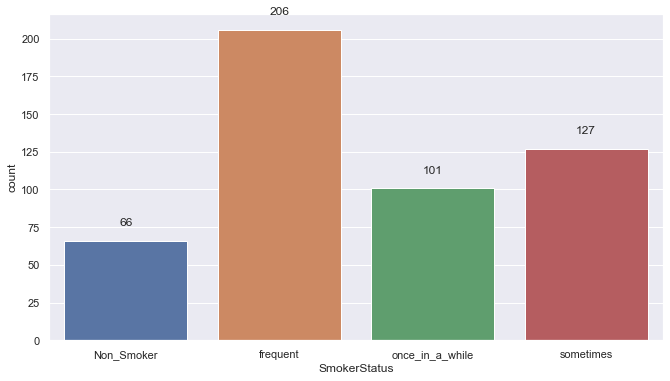

In [18]:
b=sns.countplot(x='SmokerStatus', data = dfa)

for p in b.patches:
        b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
        ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')

Text(0, 0.5, 'Customer_Needs_1')

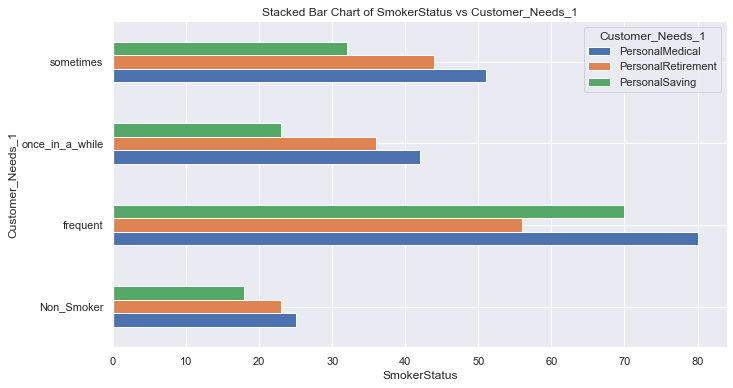

In [19]:
a=pd.crosstab(dfa.SmokerStatus,dfa.Customer_Needs_1).plot(kind='barh')
plt.title('Stacked Bar Chart of SmokerStatus vs Customer_Needs_1')
plt.xlabel('SmokerStatus')
plt.ylabel('Customer_Needs_1')

this must ignore the 0.0 as the 0.0 is just we replace it as NaN value, we do not know actually is what number.

this seems like doesnt indicate anything. can consider delete this

In [2]:
# a=pd.crosstab(dfa.PurchasedPlan1,dfa.NoOfDependent).plot(kind='barh')
# plt.title('Stacked Bar Chart of PurchasedPlan1 vs NoOfDependent')
# plt.xlabel('PurchasedPlan1')
# plt.ylabel('NoOfDependent')

Text(0, 0.5, 'Age_Bins')

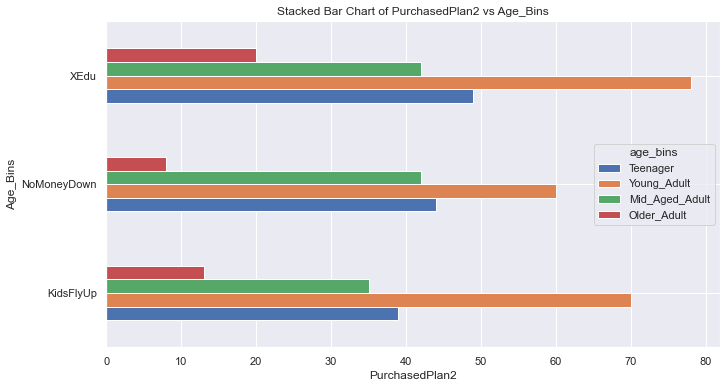

In [21]:
a=pd.crosstab(dfa.PurchasedPlan2,dfa.age_bins).plot(kind='barh')
plt.title('Stacked Bar Chart of PurchasedPlan2 vs Age_Bins')
plt.xlabel('PurchasedPlan2')
plt.ylabel('Age_Bins')

Text(0, 0.5, 'Customer_Needs_1')

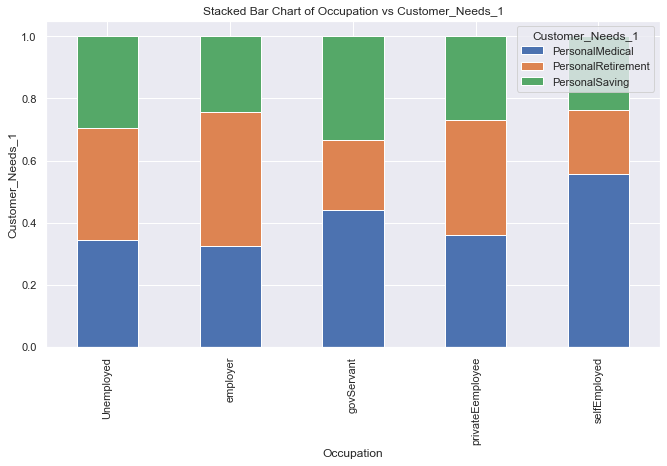

In [22]:
table=pd.crosstab(dfa.Occupation, dfa.Customer_Needs_1)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Occupation vs Customer_Needs_1')
plt.xlabel('Occupation')
plt.ylabel('Customer_Needs_1')

Text(0, 0.5, 'Customer_Needs_1')

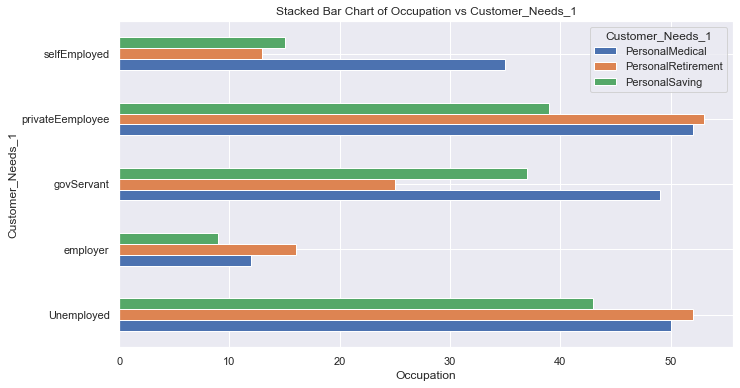

In [23]:
a=pd.crosstab(dfa.Occupation,dfa.Customer_Needs_1).plot(kind='barh')
plt.title('Stacked Bar Chart of Occupation vs Customer_Needs_1')
plt.xlabel('Occupation')
plt.ylabel('Customer_Needs_1')

Text(0, 0.5, 'PurchasedPlan2')

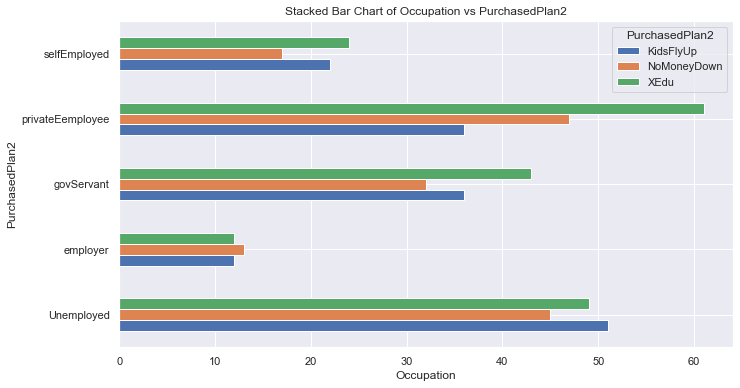

In [24]:
a=pd.crosstab(dfa.Occupation,dfa.PurchasedPlan2).plot(kind='barh')
plt.title('Stacked Bar Chart of Occupation vs PurchasedPlan2')
plt.xlabel('Occupation')
plt.ylabel('PurchasedPlan2')

In [1]:
# dfa.groupby('age_bins').sum()
# gkk = dfa.groupby(['Customer_Needs_1', 'PurchasedPlan2']) 

# gkk.age_bins.value_counts().plot(kind = 'barh', figsize =(20,20), stacked=True)

# ONE HOT & FEATURE SELECTION

In [26]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [27]:
df["MedicalComplication"] = le.fit_transform(df["MedicalComplication"].astype(str))
insure_medical = df["MedicalComplication"]
insure_medical_encoded = encoder.fit_transform(insure_medical)

In [28]:
col_list = [col for col in df.columns.tolist() if df[col].dtype.name == "object"]
df_oh = df[col_list]
df = df.drop(col_list, 1)

#the only needed code in this
df_oh = pd.get_dummies(df_oh)


df = pd.concat([df, df_oh], axis=1)
df.head()

,Age,Gender,NoOfDependent,FamilyExpenses(month),AnnualSalary,MedicalComplication,MaritalStatus_Unknown,MaritalStatus_married,MaritalStatus_single,SmokerStatus_Non_Smoker,SmokerStatus_frequent,SmokerStatus_once_in_a_while,SmokerStatus_sometimes,LifeStyle_home,LifeStyle_outdoor,LifeStyle_pub_goer,LanguageSpoken_english,LanguageSpoken_malay,LanguageSpoken_mandarin,HighestEducation_Bachelor,HighestEducation_Diploma,HighestEducation_Master,HighestEducation_PhD,Race_Unknown,Race_chinese,Race_indian,Race_malay,Race_others,Nationality_Malaysian,Nationality_Unknown,Nationality_others,MalaysiaPR_no,MalaysiaPR_yes,MovingToNewCompany_no,MovingToNewCompany_yes,Occupation_Unemployed,Occupation_employer,Occupation_govServant,Occupation_privateEemployee,Occupation_selfEmployed,Telco_celcom,Telco_digi,Telco_maxis,Telco_umobile,HomeAddress_central_mal,HomeAddress_east_mal,HomeAddress_north_mal,HomeAddress_south_mal,ResidentialType_bungalow,ResidentialType_condominium,ResidentialType_flat,ResidentialType_terrace,Customer_Needs_1_PersonalMedical,Customer_Needs_1_PersonalRetirement,Customer_Needs_1_PersonalSaving,Customer_Needs_2_KidEducation,Customer_Needs_2_KidMedical,Customer_Needs_2_KidSaving,PurchasedPlan1_COVIDFree,PurchasedPlan1_HomeSafe,PurchasedPlan1_SchoolAgain,Transport_driving,Transport_publicTransport,PurchasedPlan2_KidsFlyUp,PurchasedPlan2_NoMoneyDown,PurchasedPlan2_XEdu
0,35.0,0,2.0,10242.000000,118087.540698,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0
1,25.0,1,2.0,6335.403694,73926.000000,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1
2,27.0,1,2.0,4316.000000,140734.000000,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0
3,33.0,0,0.0,4845.000000,118087.540698,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0
4,28.0,0,2.0,9883.000000,98833.000000,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0


In [29]:
y = df.MedicalComplication
X = df.drop("MedicalComplication", 1)
colnames = X.columns

# BORUTA 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
rf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5)
fast_selector = BorutaPy(rf, n_estimators="auto",random_state =1)

In [31]:
fast_selector.fit(X.values,y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x177E8929AE8),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x177E8929AE8)

In [32]:
from sklearn.preprocessing import MinMaxScaler
boruta_score = ranking(list(map(float,fast_selector.ranking_)),colnames,order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()),columns=["Features","Score"])
boruta_score = boruta_score.sort_values("Score",ascending=False)  
     

In [33]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
3,FamilyExpenses(month),1.00
4,AnnualSalary,0.98
0,Age,0.97
41,Telco_maxis,0.95
30,MalaysiaPR_no,0.94
37,Occupation_privateEemployee,0.92
31,MalaysiaPR_yes,0.92
2,NoOfDependent,0.89
19,HighestEducation_Diploma,0.88
5,MaritalStatus_Unknown,0.86


---------Bottom 10----------


,Features,Score
26,Race_others,0.16
10,SmokerStatus_once_in_a_while,0.12
25,Race_malay,0.12
47,ResidentialType_bungalow,0.09
53,Customer_Needs_1_PersonalSaving,0.08
36,Occupation_govServant,0.08
20,HighestEducation_Master,0.05
8,SmokerStatus_Non_Smoker,0.03
35,Occupation_employer,0.02
21,HighestEducation_PhD,0.00


In [34]:
boruta_score.to_csv("boruta_score.csv")

Text(0.5, 1.0, 'Boruta Top 30 Features')

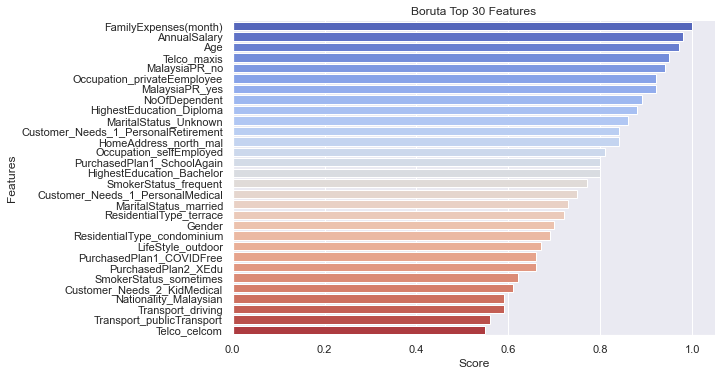

In [35]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:30], kind = "bar", 
               height=5, aspect=2, palette='coolwarm')
plt.title("Boruta Top 30 Features")

# RFE

In [36]:
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5,n_estimators=100)
rf.fit(X,y)
rfe = RFECV(rf, min_features_to_select=1,cv=3)

In [37]:
rfe.fit(X,y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [38]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

Text(0.5, 1.0, 'RFE Top 30 Features')

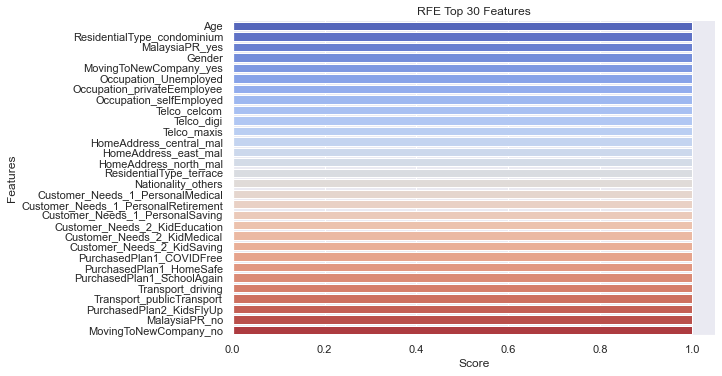

In [39]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:30], kind = "bar", 
               height=5, aspect=2, palette='coolwarm')
plt.title("RFE Top 30 Features")

In [40]:
rfe_score.to_csv("rfe_score.csv")

# DUMMY 

In [41]:
dle["MedicalComplication"] = le.fit_transform(dle["MedicalComplication"].astype(str))
insure_medical = dle["MedicalComplication"]
insure_medical_encoded = encoder.fit_transform(insure_medical)

In [42]:
dummy = dle[['SmokerStatus','Occupation',"Customer_Needs_1", 'Customer_Needs_2', 'PurchasedPlan1', 'PurchasedPlan2', 'MedicalComplication']]
dummy

,SmokerStatus,Occupation,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,PurchasedPlan2,MedicalComplication
0,Non_Smoker,employer,PersonalSaving,KidMedical,SchoolAgain,NoMoneyDown,0
1,Non_Smoker,selfEmployed,PersonalRetirement,KidMedical,SchoolAgain,XEdu,1
2,frequent,privateEemployee,PersonalMedical,KidMedical,SchoolAgain,KidsFlyUp,1
3,once_in_a_while,privateEemployee,PersonalSaving,KidSaving,SchoolAgain,NoMoneyDown,0
4,once_in_a_while,privateEemployee,PersonalRetirement,KidEducation,COVIDFree,KidsFlyUp,1
...,...,...,...,...,...,...,...
495,frequent,Unemployed,PersonalRetirement,KidMedical,HomeSafe,KidsFlyUp,1
496,frequent,selfEmployed,PersonalMedical,KidEducation,SchoolAgain,KidsFlyUp,0
497,frequent,Unemployed,PersonalSaving,KidEducation,COVIDFree,KidsFlyUp,0
498,once_in_a_while,privateEemployee,PersonalRetirement,KidSaving,COVIDFree,KidsFlyUp,0


In [43]:
cat_vars=['SmokerStatus','Occupation',"Customer_Needs_1", 'Customer_Needs_2', 'PurchasedPlan1', 'PurchasedPlan2']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dummy[var],prefix=var)
    df1=dummy.join(cat_list)
    dummy=df1
df_vars = dummy.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [44]:
df_final=dummy[to_keep]
df_final.columns.values

array(['MedicalComplication', 'SmokerStatus_Non_Smoker',
       'SmokerStatus_frequent', 'SmokerStatus_once_in_a_while',
       'SmokerStatus_sometimes', 'Occupation_Unemployed',
       'Occupation_employer', 'Occupation_govServant',
       'Occupation_privateEemployee', 'Occupation_selfEmployed',
       'Customer_Needs_1_PersonalMedical',
       'Customer_Needs_1_PersonalRetirement',
       'Customer_Needs_1_PersonalSaving', 'Customer_Needs_2_KidEducation',
       'Customer_Needs_2_KidMedical', 'Customer_Needs_2_KidSaving',
       'PurchasedPlan1_COVIDFree', 'PurchasedPlan1_HomeSafe',
       'PurchasedPlan1_SchoolAgain', 'PurchasedPlan2_KidsFlyUp',
       'PurchasedPlan2_NoMoneyDown', 'PurchasedPlan2_XEdu'], dtype=object)

In [45]:
X = df_final.loc[:, df_final.columns != 'MedicalComplication']
y = df_final.loc[:, df_final.columns == 'MedicalComplication']

from imblearn.over_sampling import SMOTE #to make the data balance

# SMOTE codes here...
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y.values.ravel(),test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y,columns=['MedicalComplication'])

print("length of oversampled data is ", len (os_data_X))
print("Number of no medical complication in oversampled data", len(os_data_y[os_data_y['MedicalComplication']==0]))
print("Number of medical complication ", len(os_data_y[os_data_y['MedicalComplication']==1]))
print("Proportion of no medical complication data in oversampled data is ", len(os_data_y[os_data_y['MedicalComplication']==0])/len(os_data_X))
print("Proportion of medical complication data in oversampled data is ", len(os_data_y[os_data_y['MedicalComplication']==1])/len(os_data_X))

length of oversampled data is  420
Number of no medical complication in oversampled data 210
Number of medical complication  210
Proportion of no medical complication data in oversampled data is  0.5
Proportion of medical complication data in oversampled data is  0.5


In [46]:
os_data_X,os_Data_y=os.fit_sample(X_train,y_train)

In [47]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=400)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.646206
         Iterations 19
                                            Results: Logit
Model:                           Logit                           Pseudo R-squared:             0.027   
Dependent Variable:              MedicalComplication             AIC:                          678.2064
Date:                            2020-09-20 01:06                BIC:                          745.6401
No. Observations:                500                             Log-Likelihood:               -323.10 
Df Model:                        15                              LL-Null:                      -332.03 
Df Residuals:                    484                             LLR p-value:                  0.27022 
Converged:                       1.0000                          Scale:                        1.0000  
No. Iterations:                  19.0000                                                               
------

In [48]:
print(dle.corr()["AnnualSalary"].abs().sort_values(ascending=False))

AnnualSalary             1.000000
Nationality              0.083047
MalaysiaPR               0.081841
Race                     0.070138
HighestEducation         0.049100
HomeAddress              0.031850
FamilyExpenses(month)    0.025558
Age                      0.024084
MovingToNewCompany       0.022931
NoOfDependent            0.022185
MaritalStatus            0.019425
MedicalComplication      0.016986
LanguageSpoken           0.003779
Transport                0.003738
Telco                    0.002140
LifeStyle                0.000269
Name: AnnualSalary, dtype: float64


# Classifciation model

In [49]:
# LOGISTIC REGRESSION

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10 40]
 [27 73]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.20      0.23        50
           1       0.65      0.73      0.69       100

    accuracy                           0.55       150
   macro avg       0.46      0.46      0.46       150
weighted avg       0.52      0.55      0.53       150



In [54]:
dle

,Age,Gender,MaritalStatus,SmokerStatus,LifeStyle,LanguageSpoken,HighestEducation,Race,Nationality,MalaysiaPR,MovingToNewCompany,Occupation,Telco,HomeAddress,ResidentialType,NoOfDependent,FamilyExpenses(month),AnnualSalary,Customer_Needs_1,Customer_Needs_2,PurchasedPlan1,Transport,PurchasedPlan2,MedicalComplication
0,35.0,female,2,Non_Smoker,0,0,0,3,1,1,1,employer,2,2,terrace,2.0,10242.000000,118087.540698,PersonalSaving,KidMedical,SchoolAgain,0,NoMoneyDown,0
1,25.0,male,0,Non_Smoker,1,1,1,1,0,0,1,selfEmployed,3,1,terrace,2.0,6335.403694,73926.000000,PersonalRetirement,KidMedical,SchoolAgain,0,XEdu,1
2,27.0,male,0,frequent,2,0,0,4,1,0,0,privateEemployee,0,0,condominium,2.0,4316.000000,140734.000000,PersonalMedical,KidMedical,SchoolAgain,0,KidsFlyUp,1
3,33.0,female,0,once_in_a_while,2,0,0,3,0,1,0,privateEemployee,2,3,terrace,0.0,4845.000000,118087.540698,PersonalSaving,KidSaving,SchoolAgain,0,NoMoneyDown,0
4,28.0,female,0,once_in_a_while,0,0,0,1,0,1,1,privateEemployee,3,1,condominium,2.0,9883.000000,98833.000000,PersonalRetirement,KidEducation,COVIDFree,0,KidsFlyUp,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31.0,female,1,frequent,1,0,1,0,1,1,1,Unemployed,1,2,terrace,2.0,4831.000000,118087.540698,PersonalRetirement,KidMedical,HomeSafe,0,KidsFlyUp,1
496,26.0,male,1,frequent,0,0,0,4,1,0,0,selfEmployed,2,1,condominium,0.0,7455.000000,65384.000000,PersonalMedical,KidEducation,SchoolAgain,0,KidsFlyUp,0
497,19.0,female,0,frequent,0,1,1,4,1,1,0,Unemployed,2,0,condominium,2.0,3329.000000,51962.000000,PersonalSaving,KidEducation,COVIDFree,0,KidsFlyUp,0
498,41.0,male,0,once_in_a_while,2,1,0,2,0,1,1,privateEemployee,3,0,terrace,3.0,9300.000000,118087.540698,PersonalRetirement,KidSaving,COVIDFree,0,KidsFlyUp,0


In [55]:
print(dle.corr()["AnnualSalary"].abs().sort_values(ascending=False))

AnnualSalary             1.000000
Nationality              0.083047
MalaysiaPR               0.081841
Race                     0.070138
HighestEducation         0.049100
HomeAddress              0.031850
FamilyExpenses(month)    0.025558
Age                      0.024084
MovingToNewCompany       0.022931
NoOfDependent            0.022185
MaritalStatus            0.019425
MedicalComplication      0.016986
LanguageSpoken           0.003779
Transport                0.003738
Telco                    0.002140
LifeStyle                0.000269
Name: AnnualSalary, dtype: float64


In [56]:
nb = dle[['Occupation','FamilyExpenses(month)','AnnualSalary']]
nbb = df[['Occupation_Unemployed','Occupation_employer','Occupation_govServant','Occupation_privateEemployee','FamilyExpenses(month)','AnnualSalary']]

In [57]:
nb

,Occupation,FamilyExpenses(month),AnnualSalary
0,employer,10242.000000,118087.540698
1,selfEmployed,6335.403694,73926.000000
2,privateEemployee,4316.000000,140734.000000
3,privateEemployee,4845.000000,118087.540698
4,privateEemployee,9883.000000,98833.000000
...,...,...,...
495,Unemployed,4831.000000,118087.540698
496,selfEmployed,7455.000000,65384.000000
497,Unemployed,3329.000000,51962.000000
498,privateEemployee,9300.000000,118087.540698


In [58]:
# For this example, we use the mass, width, and height features of each fruit instance
X1 = nbb.drop('Occupation_Unemployed', axis=1)
y1 = nbb['Occupation_Unemployed']

X2 = nbb.drop('Occupation_employer', axis=1)
y2 = nbb['Occupation_employer']

X3 = nbb.drop('Occupation_govServant', axis=1)
y3 = nbb['Occupation_govServant']

X4 = nbb.drop('Occupation_privateEemployee', axis=1)
y4 = nbb['Occupation_privateEemployee']

X = nb.drop('Occupation', axis=1)
y = nb['Occupation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

In [59]:
from sklearn.naive_bayes import GaussianNB

nb1= GaussianNB()
nb1.fit(X1_train, y1_train)

nb2= GaussianNB()
nb2.fit(X2_train, y2_train)

nb3= GaussianNB()
nb3.fit(X3_train, y3_train)

nb4= GaussianNB()
nb4.fit(X4_train, y4_train)

nbg= GaussianNB()
nbg.fit(X_train, y_train) #this is for df b4 lbe 

GaussianNB()

#Classfication using logistic Regression


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg1 = LogisticRegression()
logreg1.fit(X1_train, y1_train)

logreg2 = LogisticRegression()
logreg2.fit(X2_train, y2_train)

logreg3 = LogisticRegression()
logreg3.fit(X3_train, y3_train)

logreg4 = LogisticRegression()
logreg4.fit(X4_train, y4_train)


LogisticRegression()

In [61]:
from sklearn.neighbors import KNeighborsClassifier

classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X1_train, y1_train)

classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X2_train, y2_train)

classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(X3_train, y3_train)

classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit(X4_train, y4_train)


KNeighborsClassifier()

In [62]:
y2_pred=nb2.predict(X2_test)
y3_pred=nb2.predict(X3_test)
print("Train shape for X2_train: " +str(X2_train.shape))
print("Train shape for y2_train: " +str(y2_train.shape))
print(" ")
print("Test shape for X2_test: " +str(X2_test.shape))
print("Test shape for y2_test: " +str(y2_test.shape))
print(" ")
print("Train shape for X3_train: " +str(X3_train.shape))
print("Train shape for y3_train: " +str(y3_train.shape))
print(" ")
print("Test shape for X3_test: " +str(X3_test.shape))
print("Test shape for y3_test: " +str(y3_test.shape))

Train shape for X2_train: (350, 5)
Train shape for y2_train: (350,)
 
Test shape for X2_test: (150, 5)
Test shape for y2_test: (150,)
 
Train shape for X3_train: (350, 5)
Train shape for y3_train: (350,)
 
Test shape for X3_test: (150, 5)
Test shape for y3_test: (150,)


In [63]:
print("")
print('Accuracy of of occupation before applying preprocessing= {:.2f}'.format(nbg.score(X_test, y_test))+'%')
print("")
print ('Naive Bayes Algorithm : ')
print("")
print('Accuracy of unemployed= {:.2f}'. format(nb1.score(X1_test, y1_test))+'%')
print('Accuracy of employer= {:.2f}'. format(nb2.score(X2_test, y2_test))+'%')
print('Accuracy of goverment servant= {:.2f}'. format(nb3.score(X3_test, y3_test))+'%')
print('Accuracy of of private employee= {:.2f}'.format(nb4.score(X4_test, y4_test))+'%')
print("")
print ('Logistic Regression : ')
print("")
print('Accuracy of unemployed= {:.2f}'. format(logreg1.score(X1_test, y1_test))+'%')
print('Accuracy of employer= {:.2f}'. format(logreg2.score(X2_test, y2_test))+'%')
print('Accuracy of goverment servant= {:.2f}'. format(logreg3.score(X3_test, y3_test))+'%')
print('Accuracy of of private employee= {:.2f}'.format(logreg4.score(X4_test, y4_test))+'%')

print("")
print ('KNN Algorithm : ')
print("")
print('Accuracy of unemployed= {:.2f}'. format(classifier1.score(X1_test, y1_test))+'%')
print('Accuracy of employer= {:.2f}'. format(classifier2.score(X2_test, y2_test))+'%')
print('Accuracy of  goverment servant= {:.2f}'. format(classifier3.score(X3_test, y3_test))+'%')
print('Accuracy of private employee= {:.2f}'. format(classifier4.score(X4_test, y4_test))+'%')
print("")



Accuracy of of occupation before applying preprocessing= 0.31%

Naive Bayes Algorithm : 

Accuracy of unemployed= 0.71%
Accuracy of employer= 0.93%
Accuracy of goverment servant= 0.84%
Accuracy of of private employee= 0.69%

Logistic Regression : 

Accuracy of unemployed= 0.71%
Accuracy of employer= 0.93%
Accuracy of goverment servant= 0.84%
Accuracy of of private employee= 0.69%

KNN Algorithm : 

Accuracy of unemployed= 0.63%
Accuracy of employer= 0.93%
Accuracy of  goverment servant= 0.75%
Accuracy of private employee= 0.71%



In [64]:
from sklearn.metrics import classification_report
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       139
           1       0.00      0.00      0.00        11

    accuracy                           0.93       150
   macro avg       0.46      0.50      0.48       150
weighted avg       0.86      0.93      0.89       150



In [65]:
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       126
           1       0.00      0.00      0.00        24

    accuracy                           0.84       150
   macro avg       0.42      0.50      0.46       150
weighted avg       0.71      0.84      0.77       150



In [66]:
cluster = df.copy()
cluster = dle[['MovingToNewCompany','MalaysiaPR']]

In [67]:
from sklearn.datasets.samples_generator import make_blobs
X = cluster.drop('MalaysiaPR',axis=1)
y = cluster['MalaysiaPR']

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [69]:
X = cluster.drop('MalaysiaPR',axis=1)
y = cluster['MalaysiaPR']

In [70]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 2 3 3 2 3 2 2 3 3 3 3 3 2 2 3 3 2 2 3 2 2 2 3 3 2 2 3 2 3 2 2 2 2 2 2 2
 2 3 3 2 2 2 2 3 3 2 2 2 2 3 3 2 3 3 2 2 2 2 2 2 2 3 2 2 3 3 2 2 2 2 2 2 2
 2 2 3 2 3 3 2 3 3 3 3 2 2 2 2 2 2 3 3 3 2 2 2 3 2 3 2 2 2 2 2 3 2 3 3 3 2
 3 2 2 3 3 2 2 3 2 3 2 3 2 2 3 3 2 2 3 3 2 2 3 2 2 2 2 3 3 2 3 2 2 2 2 2 2
 3 3 2 3 2 2 3 3 2 3 3 2 2 2 2 3 3 3 2 2 2 2 3 2 3 2 3 3 3 2 2 3 3 2 2 2 2
 3 3 2 2 2 3 2 3 2 2 2 3 2 2 3 2 3 2 2 3 2 2 3 3 3 2 3 3 3 3 3 3 2 3 3 3 2
 2 3 2 2 3 2 2 3 2 2 2 3 3 2 3 3 2 3 2 2 2 3 2 3 3 2 2 3 3 2 3 2 2 2 2 3 2
 2 3 3 3 2 2 3 2 2 3 2 3 3 2 2 3 2 2 3 2 2 2 3 3 2 2 2 3 2 3 2 3 3 2 3 3 2
 2 3 3 2 2 2 2 2 2 3 2 2 2 3 2 3 2 2 2 3 3 3 2 2 2 3 3 3 3 2 2 2 3 2 2 2 3
 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 3 3 2 3 2 3 3 2 3 3 2 3 2 3 3 2 3 2 2 3
 3 3 3 2 3 3 3 3 2 2 3 3 3 2 3 3 3 3 3 2 3 2 2 3 3 2 3 2 3 3 2 3 2 3 3 2 2
 2 2 2 3 3 3 2 2 2 3 2 3 2 2 3 2 2 2 3 3 2 2 2 2 3 2 2 2 3 2 2 3 2 3 3 2 3
 3 2 2 2 2 2 2 3 3 3 2 2 2 2 3 2 3 3 2 2 3 2 2 2 3 2 3 2 3 2 3 3 3 3 3 3 2
 3 2 2 2 2 3 2 3 2 3 2 2 

array([[1.00000000e+00],
       [6.66133815e-16],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00]])

In [71]:
cluster.to_csv("cluster.csv")

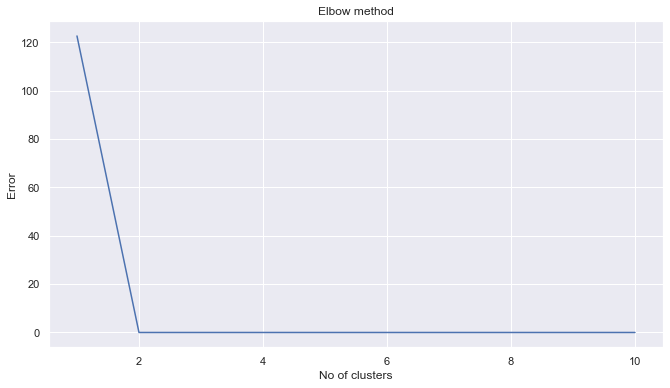

In [72]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()